# Make some plots of the input and output data


In [2]:
import numpy as np
import h5py

# Please download the file SCNeuronModelCompetition.mat from here.
# https://github.com/santacruzml/fall-17-scml-competition/releases/download/0.0-data/SCNeuronModelCompetition.mat

datafile = h5py.File('../SCNeuronModelCompetition.mat')
movie = datafile.get('trainingmovie_mini') # movie for training
frhist = datafile.get('FRhist_tr') # firing rate histograms

def preprocess_movie(movie_in):
    # trim the letterbox from the video
    movie_out = np.array(movie_in[:,:,(16*128):(80*128)],dtype=np.uint8)
    # reshape to original video frames
    movie_out = np.reshape(movie_out,(288,150,64,128,1))
    return movie_out

movie = preprocess_movie(movie)




In [77]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
from matplotlib import animation
from IPython.display import HTML


%matplotlib inline

rcParams['figure.figsize'] = (12,6)

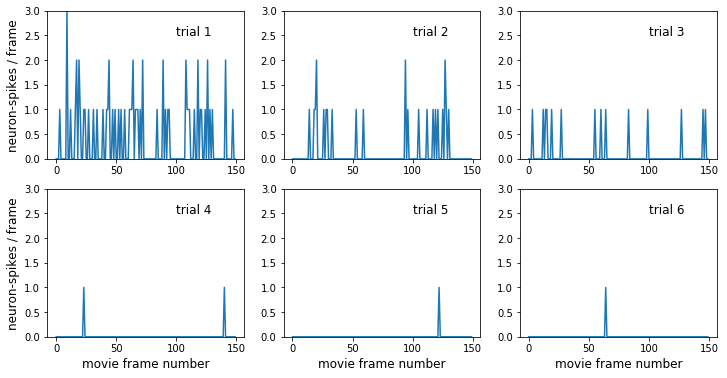

In [4]:
# neuron 0, first movie section

m = 3
n = 0
plt.figure()
for ii in range(6):
    # plot each of the 6 trials of the same movie
    plt.subplot(2,3,ii+1)
    plt.plot(np.squeeze(frhist[(m*6+ii):(m*6+ii+1), :, n]))
    plt.ylim((0,3))
    plt.text(100,2.5, 'trial '+str(ii+1), fontsize=12)
    if (ii % 3)==0:
        plt.ylabel('neuron-spikes / frame', size=12)
    if ii>=3:
        plt.xlabel('movie frame number', size=12)    
    

plt.savefig('neuron0.png')


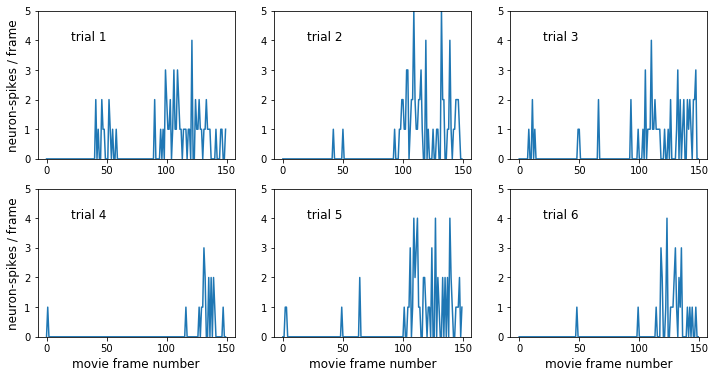

In [5]:
# neuron 31, 20th movie section

m = 20
n=31
plt.figure()
for ii in range(6):
    # plot each of the 6 trials of the same movie
    plt.subplot(2,3,ii+1)
    plt.plot(np.squeeze(frhist[(m*6+ii):(m*6+ii+1), :, n]))
    plt.ylim((0,5))
    plt.text(20,4, 'trial '+str(ii+1), fontsize=12)
    if (ii % 3)==0:
        plt.ylabel('neuron-spikes / frame', size=12)
    if ii>=3:
        plt.xlabel('movie frame number', size=12)     
        
plt.savefig('neuron31.png')        

In [ ]:
# quick animation to look at the video

clip_num = 8*6

mframe0 = np.squeeze(movie[clip_num,0,:,:])
fig = plt.figure()
im = plt.imshow(mframe0, vmin=0, vmax=255, cmap='gray', animated=True)

def updatefig(ii):
    mframe = np.squeeze(movie[clip_num,ii,:,:])
    # brighten up the frame
    mframe = 1.5 * mframe
    mframe[mframe>255] = 255
    mframe = mframe.astype('uint8')
    im.set_array(mframe)
    return im,

ani = animation.FuncAnimation(fig, updatefig, interval=50, frames=150, blit=True)
HTML(ani.to_jshtml())



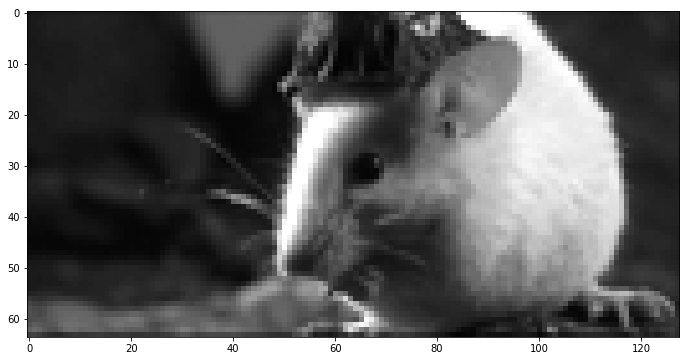

In [169]:
# input movie plot

plt.figure
mframe = np.squeeze(movie[8*6,31,:,:])
mframe = 1.5 * mframe
mframe[mframe>255] = 255
imgplot = plt.imshow(mframe)
imgplot.set_cmap('gray')

plt.savefig('movie_frame.png')